In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/customer_behavior_analytcis.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0 

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Rename column for consistency
df.rename(columns={'discount_counts': 'discount_count'}, inplace=True)

# Select relevant features (excluding customer_id)
features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_count']

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Normalize the data using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Display the first few rows of the processed data
print(df_scaled.head())


   total_purchases  avg_cart_value  total_time_spent  product_click  \
0        -0.658436        0.988916          0.086238      -0.634946   
1         1.502265       -0.941123         -1.227549      -0.821002   
2        -1.378670       -0.794296          1.263694       1.349649   
3         1.934405       -0.892119         -1.165497      -0.758984   
4        -0.658436        0.917521         -0.463364       0.109277   

   discount_count  
0       -0.952061  
1        0.593022  
2       -0.510608  
3        1.255200  
4       -0.289882  


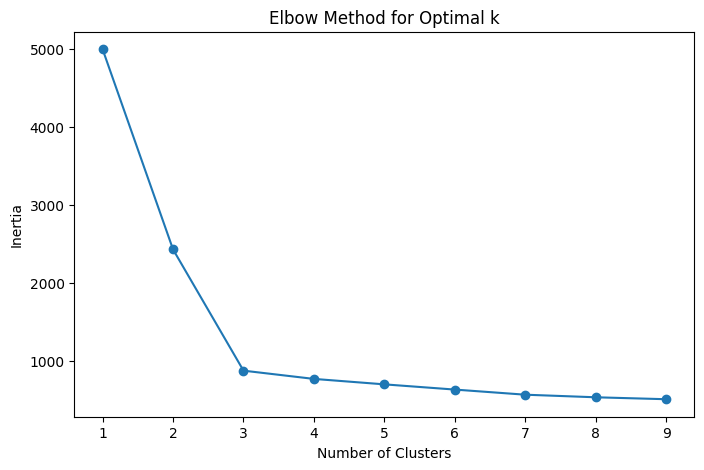

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use the Elbow method to find the optimal number of clusters
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [ ]:
# Apply K-Means with k=3 (based on the elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Assign cluster labels to original data
df["Cluster"] = df_scaled["Cluster"]

# Display first few rows with clusters
print(df.head())


   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_count customer_id  Cluster  
0             0.0     CM00000        0  
1             7.0     CM00001        2  
2             2.0     CM00002        1  
3            10.0     CM00003        2  
4             3.0     CM00004        0  


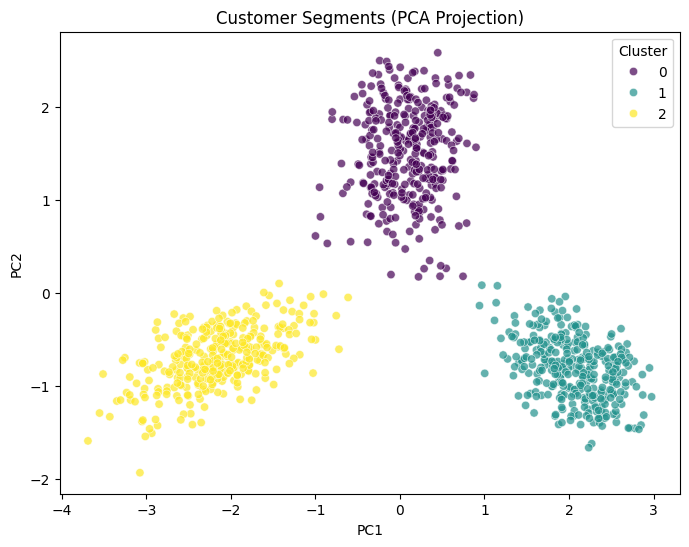

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop("Cluster", axis=1))

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = df_scaled["Cluster"]

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue=df_pca["Cluster"], palette="viridis", data=df_pca, alpha=0.7)
plt.title("Customer Segments (PCA Projection)")
plt.show()


In [ ]:
# Compute mean values for each cluster
cluster_summary = df.groupby("Cluster")[features].mean()
print(cluster_summary)


         total_purchases  avg_cart_value  total_time_spent  product_click  \
Cluster                                                                     
0              10.212991      145.390574         40.472126      20.120186   
1               4.943626       49.348259         90.211837      49.457687   
2              19.540531       31.346684         17.511682      15.224222   

         discount_count  
Cluster                  
0              1.940120  
1              1.027108  
2              9.969970  
